In [205]:
!pip install xgboost

In [207]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
import librosa
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [209]:
import os
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from scipy.stats import skew, kurtosis

INDEX = 13
DATA_DIR = '/Users/sahanaj/DS203-Project-main/new-test-data/test-mfcc-v2' #update with where you stored the file
DATA2_DIR = '/Users/sahanaj/DS203-Project-main/new-test-data/test-mfcc-v2-copy'
def aggregate_mfcc_selective(mfcc_data):
    mfcc_selected = mfcc_data[INDEX:, :]
    #features for data from 13-20
    mfcc_mean = np.mean(mfcc_selected, axis=1)
    mfcc_std = np.std(mfcc_selected, axis=1)
    mfcc_max = np.max(mfcc_selected, axis=1)
    mfcc_min = np.min(mfcc_selected, axis=1)
    
    features = np.concatenate([mfcc_mean, mfcc_std, mfcc_max, mfcc_min])
    return features

def aggregate_mfcc_selective2(mfcc_data):
    mfcc_selected = mfcc_data[:3, :] # Select first 20 MFCCs
    
    mfcc_mean = np.mean(mfcc_selected, axis=1)
    mfcc_std = np.std(mfcc_selected, axis=1)
    mfcc_max = np.max(mfcc_selected, axis=1)
    mfcc_min = np.min(mfcc_selected, axis=1)
    
    features = np.concatenate([mfcc_mean, mfcc_std, mfcc_max, mfcc_min])
    return features

# total number of files in the directory
total_files = len(os.listdir(DATA_DIR))
index = 1

# Initialize lists to store features, file names, and labels
mfcc_all_songs = []
file_names = []
generated_features = []
labels = []
total_songs = len(os.listdir(DATA_DIR))
# Iterate over all files in the specified directory
for file_name in os.listdir(DATA_DIR):
        file_path = os.path.join(DATA_DIR, file_name)
        file_path2 = os.path.join(DATA2_DIR, file_name)
        mfcc_data = pd.read_csv(file_path, header=None).values
        mfcc_data = mfcc_data[:20]
        mfcc_data2 = pd.read_csv(file_path2, header=None).values
        # Compute aggregated MFCC features
        aggregated_features = aggregate_mfcc_selective(mfcc_data)
        aggregated_features2 = aggregate_mfcc_selective2(mfcc_data2)

        skewness = skew(mfcc_data, axis=1)
        kurt = kurtosis(mfcc_data, axis=1)
        range_max_min = np.ptp(mfcc_data, axis=1)

        total_energy = np.sum(mfcc_data ** 2, axis=1)
        energy_entropy = -np.sum(mfcc_data ** 2 * np.log(mfcc_data ** 2 + 1e-10), axis=1)
        q25 = np.percentile(mfcc_data, 25, axis=1)
        q75 = np.percentile(mfcc_data, 75, axis=1)
    
        delta_mfcc = librosa.feature.delta(mfcc_data, order=1)
        delta_delta_mfcc = librosa.feature.delta(mfcc_data, order=2)
        

        delta_mean = np.mean(delta_mfcc, axis=1)
        delta_std = np.std(delta_mfcc, axis=1)
        delta_max = np.max(delta_mfcc, axis=1)
        delta_min = np.min(delta_mfcc, axis=1)
        delta_skew = skew(librosa.feature.delta(mfcc_data), axis=1)
        delta_kurtosis = kurtosis(librosa.feature.delta(mfcc_data), axis=1)
        delta_range = np.ptp(librosa.feature.delta(mfcc_data), axis=1)
        delta_total_energy = np.sum(librosa.feature.delta(mfcc_data) ** 2, axis=1)
        delta_energy_entropy = -np.sum(librosa.feature.delta(mfcc_data) ** 2 * np.log(librosa.feature.delta(mfcc_data) ** 2 + 1e-10), axis=1)
        delta_q25 = np.percentile(delta_mfcc, 25, axis=1)
        delta_q75 = np.percentile(delta_mfcc, 75, axis=1)
            
        delta_delta_mean = np.mean(delta_delta_mfcc, axis=1)
        delta_delta_std = np.std(delta_delta_mfcc, axis=1)
        delta_delta_max = np.max(delta_delta_mfcc, axis=1)
        delta_delta_min = np.min(delta_delta_mfcc, axis=1)
        delta_delta_skew = skew(librosa.feature.delta(delta_delta_mfcc, order=2), axis=1)
        delta_delta_kurtosis = kurtosis(librosa.feature.delta(delta_delta_mfcc, order=2), axis=1)
        delta_delta_range = np.ptp(librosa.feature.delta(delta_delta_mfcc, order=2), axis=1)
        delta_delta_total_energy = np.sum(librosa.feature.delta(delta_delta_mfcc, order=2) ** 2, axis=1)
        delta_delta_energy_entropy = -np.sum(librosa.feature.delta(delta_delta_mfcc, order=2) 
                                              ** 2 * np.log(librosa.feature.delta(delta_delta_mfcc, order=2) ** 2 + 1e-10), axis=1)
        delta_delta_q25 = np.percentile(delta_delta_mfcc, 25, axis=1)
        delta_delta_q75 = np.percentile(delta_delta_mfcc, 75, axis=1)

    
        delta_mfcc2 = librosa.feature.delta(mfcc_data2, order=1)
        delta_delta_mfcc2 = librosa.feature.delta(mfcc_data2, order=2)
        delta_mean2 = np.mean(delta_mfcc2, axis=1)
        delta_std2 = np.std(delta_mfcc2, axis=1)
        delta_max2 = np.max(delta_mfcc2, axis=1)
        delta_min2 = np.min(delta_mfcc2, axis=1)
        delta_delta_mean2 = np.mean(delta_delta_mfcc2, axis=1)
        delta_delta_std2 = np.std(delta_delta_mfcc2, axis=1)
        delta_delta_max2 = np.max(delta_delta_mfcc2, axis=1)
        delta_delta_min2 = np.min(delta_delta_mfcc2, axis=1)
        delta_delta_range2 = np.ptp(delta_delta_mfcc2, axis=1)  
        delta_delta_total_energy2 = np.sum(librosa.feature.delta(delta_delta_mfcc2, order=2) ** 2, axis=1)
        delta_delta_energy_entropy2 = -np.sum(librosa.feature.delta(delta_delta_mfcc2, order=2) 
                                              ** 2 * np.log(librosa.feature.delta(delta_delta_mfcc2, order=2) ** 2 + 1e-10), axis=1)
        delta_delta_q252 = np.percentile(delta_delta_mfcc2, 25, axis=1)
        delta_delta_q752 = np.percentile(delta_delta_mfcc2, 75, axis=1)

        # PCA_mfcc = PCA(n_components=5)
        # PCA_mfcc.fit(mfcc_data.T)
        # PCA_mfcc_features = PCA_mfcc.components_.flatten()

        # Compile all features into a single vector
        features = np.concatenate([
            aggregated_features.flatten(),
            aggregated_features2.flatten(),
            range_max_min.flatten(),
            skewness.flatten(),
            kurt.flatten(),
            total_energy.flatten(),
            energy_entropy.flatten(),
            q25.flatten(),
            q75.flatten(),
            
            delta_mean.flatten(),
            delta_std.flatten(),
            delta_max.flatten(),
            delta_min.flatten(),
            delta_skew.flatten(),
            delta_kurtosis.flatten(),
            delta_range.flatten(),
            delta_total_energy.flatten(),
            delta_energy_entropy.flatten(),
            delta_q25.flatten(),
            delta_q75.flatten(),
            
            delta_delta_mean.flatten(),
            delta_delta_std.flatten(),
            delta_delta_max.flatten(),
            delta_delta_min.flatten(),
            delta_delta_skew.flatten(),
            delta_delta_kurtosis.flatten(),
            delta_delta_range.flatten(),
            delta_delta_total_energy.flatten(),
            delta_delta_energy_entropy.flatten(),
            delta_delta_q25.flatten(),
            delta_delta_q75.flatten(),
            
            delta_mean2.flatten(),
            delta_std2.flatten(),
            delta_max2.flatten(),
            delta_min2.flatten(),
            delta_delta_mean2.flatten(),
            delta_delta_std2.flatten(),
            delta_delta_max2.flatten(),
            delta_delta_min2.flatten(),
            delta_delta_total_energy2.flatten(),
            delta_delta_energy_entropy2.flatten(),
            delta_delta_q252.flatten(),
            delta_delta_q752.flatten(),

            # PCA_mfcc_features.flatten(),
        ])

        # Determine label based on filename pattern
        if file_name.startswith('Asha-Bhosle'):
            label = 'Asha Bhosle'
        elif file_name.startswith('Kishore-Kumar'):
            label = 'Kishore Kumar'
        elif file_name.startswith('Lavni'):
            label = 'Lavni'
        elif file_name.startswith('Michael-Jackson'):
            label = 'Michael Jackson'
        elif file_name.startswith('Jana-Gana-Mana'):
            label = 'Jana-Gana-Mana'
        elif file_name.startswith('Bhavgeet'):
             label = 'Bhavgeet'
        else:
            print(f'Unknown label for file: {file_name}')
            
        print(f'Processed {file_name}')
        print(f'Processed {index} of {total_songs}')
        generated_features.append(features)
        file_names.append(file_name)
        labels.append(label)
        index += 1

# Create DataFrame and save to CSV
generated_features = np.vstack(generated_features)
total_features = generated_features.shape[1]
feature_columns = [f'feature_{i}' for i in range(total_features)]

total_data_df = pd.DataFrame(generated_features, columns=feature_columns)
total_data_df.insert(0, 'File', file_names)
total_data_df.insert(1, 'Label', labels)

# Save generated features to 'features_generated.csv'
total_data_df.to_csv(f'features_generated_{INDEX}.csv', index=False)


Processed Asha-Bhosle-47.csv
Processed 1 of 495
Processed Asha-Bhosle-53.csv
Processed 2 of 495
Processed Jana-Gana-Mana-16.csv
Processed 3 of 495
Processed Kishore-Kumar-43.csv
Processed 4 of 495
Processed Kishore-Kumar-57.csv
Processed 5 of 495
Processed Kishore-Kumar-16-MFCC.csv
Processed 6 of 495
Processed Kishore-Kumar-17-MFCC.csv
Processed 7 of 495
Processed Bhavgeet-44.csv
Processed 8 of 495
Processed Bhavgeet-50.csv
Processed 9 of 495
Processed Lavni-43.csv
Processed 10 of 495
Processed Lavni-57.csv
Processed 11 of 495
Processed Michael-Jackson-29.csv
Processed 12 of 495
Processed Asha-Bhosle-8.csv
Processed 13 of 495
Processed Michael-Jackson-15.csv
Processed 14 of 495
Processed Asha-Bhosle-9.csv
Processed 15 of 495
Processed Michael-Jackson-14.csv
Processed 16 of 495
Processed Michael-Jackson-28.csv
Processed 17 of 495
Processed Lavni-56.csv
Processed 18 of 495
Processed Lavni-42.csv
Processed 19 of 495
Processed Bhavgeet-1-MFCC.csv
Processed 20 of 495
Processed Bhavgeet-51.c

In [211]:
import re

UNLABELLED_DIR = '/Users/sahanaj/DS203-Project-main/data-v2'
UNLABELLED_DIR2 = '/Users/sahanaj/DS203-Project-main/data-v2-copy'
# total number of files in the directory
total_files = len(os.listdir(DATA_DIR))
index = 1

# Initialize lists to store features, file names, and labels
mfcc_all_songs = []
file_names = []
generated_features = []
labels = []
total_songs = len(os.listdir(UNLABELLED_DIR))

# Function to extract the numeric part of the filename
def extract_number(file_name):
    match = re.search(r'(\d+)-MFCC.csv', file_name)
    if match:
        return int(match.group(1))
    return float('inf')  # In case the file doesn't match the pattern

# Sort files based on the numeric part of the filename
file_list = sorted(os.listdir(UNLABELLED_DIR), key=extract_number)

# Iterate over all files in the specified directory
for file_name in file_list:
        file_path = os.path.join(UNLABELLED_DIR, file_name)
        file_path2 = os.path.join(UNLABELLED_DIR2, file_name)
        mfcc_data = pd.read_csv(file_path, header=None).values
        mfcc_data = mfcc_data[:20]
        mfcc_data2 = pd.read_csv(file_path2, header=None).values
        # Compute aggregated MFCC features
        aggregated_features = aggregate_mfcc_selective(mfcc_data)
        aggregated_features2 = aggregate_mfcc_selective2(mfcc_data2)

        skewness = skew(mfcc_data, axis=1)
        kurt = kurtosis(mfcc_data, axis=1)
        range_max_min = np.ptp(mfcc_data, axis=1)

        total_energy = np.sum(mfcc_data ** 2, axis=1)
        energy_entropy = -np.sum(mfcc_data ** 2 * np.log(mfcc_data ** 2 + 1e-10), axis=1)
        q25 = np.percentile(mfcc_data, 25, axis=1)
        q75 = np.percentile(mfcc_data, 75, axis=1)
    
        delta_mfcc = librosa.feature.delta(mfcc_data, order=1)
        delta_delta_mfcc = librosa.feature.delta(mfcc_data, order=2)
        

        delta_mean = np.mean(delta_mfcc, axis=1)
        delta_std = np.std(delta_mfcc, axis=1)
        delta_max = np.max(delta_mfcc, axis=1)
        delta_min = np.min(delta_mfcc, axis=1)
        delta_skew = skew(librosa.feature.delta(mfcc_data), axis=1)
        delta_kurtosis = kurtosis(librosa.feature.delta(mfcc_data), axis=1)
        delta_range = np.ptp(librosa.feature.delta(mfcc_data), axis=1)
        delta_total_energy = np.sum(librosa.feature.delta(mfcc_data) ** 2, axis=1)
        delta_energy_entropy = -np.sum(librosa.feature.delta(mfcc_data) ** 2 * np.log(librosa.feature.delta(mfcc_data) ** 2 + 1e-10), axis=1)
        delta_q25 = np.percentile(delta_mfcc, 25, axis=1)
        delta_q75 = np.percentile(delta_mfcc, 75, axis=1)
            
        delta_delta_mean = np.mean(delta_delta_mfcc, axis=1)
        delta_delta_std = np.std(delta_delta_mfcc, axis=1)
        delta_delta_max = np.max(delta_delta_mfcc, axis=1)
        delta_delta_min = np.min(delta_delta_mfcc, axis=1)
        delta_delta_skew = skew(librosa.feature.delta(delta_delta_mfcc, order=2), axis=1)
        delta_delta_kurtosis = kurtosis(librosa.feature.delta(delta_delta_mfcc, order=2), axis=1)
        delta_delta_range = np.ptp(librosa.feature.delta(delta_delta_mfcc, order=2), axis=1)
        delta_delta_total_energy = np.sum(librosa.feature.delta(delta_delta_mfcc, order=2) ** 2, axis=1)
        delta_delta_energy_entropy = -np.sum(librosa.feature.delta(delta_delta_mfcc, order=2) 
                                              ** 2 * np.log(librosa.feature.delta(delta_delta_mfcc, order=2) ** 2 + 1e-10), axis=1)
        delta_delta_q25 = np.percentile(delta_delta_mfcc, 25, axis=1)
        delta_delta_q75 = np.percentile(delta_delta_mfcc, 75, axis=1)

    
        delta_mfcc2 = librosa.feature.delta(mfcc_data2, order=1)
        delta_delta_mfcc2 = librosa.feature.delta(mfcc_data2, order=2)
        delta_mean2 = np.mean(delta_mfcc2, axis=1)
        delta_std2 = np.std(delta_mfcc2, axis=1)
        delta_max2 = np.max(delta_mfcc2, axis=1)
        delta_min2 = np.min(delta_mfcc2, axis=1)
        delta_delta_mean2 = np.mean(delta_delta_mfcc2, axis=1)
        delta_delta_std2 = np.std(delta_delta_mfcc2, axis=1)
        delta_delta_max2 = np.max(delta_delta_mfcc2, axis=1)
        delta_delta_min2 = np.min(delta_delta_mfcc2, axis=1)
        delta_delta_range2 = np.ptp(delta_delta_mfcc2, axis=1)  
        delta_delta_total_energy2 = np.sum(librosa.feature.delta(delta_delta_mfcc2, order=2) ** 2, axis=1)
        delta_delta_energy_entropy2 = -np.sum(librosa.feature.delta(delta_delta_mfcc2, order=2) 
                                              ** 2 * np.log(librosa.feature.delta(delta_delta_mfcc2, order=2) ** 2 + 1e-10), axis=1)
        delta_delta_q252 = np.percentile(delta_delta_mfcc2, 25, axis=1)
        delta_delta_q752 = np.percentile(delta_delta_mfcc2, 75, axis=1)

        # PCA_mfcc = PCA(n_components=5)
        # PCA_mfcc.fit(mfcc_data.T)
        # PCA_mfcc_features = PCA_mfcc.components_.flatten()

        # Compile all features into a single vector
        features = np.concatenate([
            aggregated_features.flatten(),
            aggregated_features2.flatten(),
            range_max_min.flatten(),
            skewness.flatten(),
            kurt.flatten(),
            total_energy.flatten(),
            energy_entropy.flatten(),
            q25.flatten(),
            q75.flatten(),
            
            delta_mean.flatten(),
            delta_std.flatten(),
            delta_max.flatten(),
            delta_min.flatten(),
            delta_skew.flatten(),
            delta_kurtosis.flatten(),
            delta_range.flatten(),
            delta_total_energy.flatten(),
            delta_energy_entropy.flatten(),
            delta_q25.flatten(),
            delta_q75.flatten(),
            
            delta_delta_mean.flatten(),
            delta_delta_std.flatten(),
            delta_delta_max.flatten(),
            delta_delta_min.flatten(),
            delta_delta_skew.flatten(),
            delta_delta_kurtosis.flatten(),
            delta_delta_range.flatten(),
            delta_delta_total_energy.flatten(),
            delta_delta_energy_entropy.flatten(),
            delta_delta_q25.flatten(),
            delta_delta_q75.flatten(),
            
            delta_mean2.flatten(),
            delta_std2.flatten(),
            delta_max2.flatten(),
            delta_min2.flatten(),
            delta_delta_mean2.flatten(),
            delta_delta_std2.flatten(),
            delta_delta_max2.flatten(),
            delta_delta_min2.flatten(),
            delta_delta_total_energy2.flatten(),
            delta_delta_energy_entropy2.flatten(),
            delta_delta_q252.flatten(),
            delta_delta_q752.flatten(),

            # PCA_mfcc_features.flatten(),
        ])
            
        print(f'Processed {file_name}')
        print(f'Processed {index} of {total_songs}')
        generated_features.append(features)
        file_names.append(file_name)
        labels.append(label)
        index += 1

# Create DataFrame and save to CSV
generated_features = np.vstack(generated_features)
total_features = generated_features.shape[1]
feature_columns = [f'feature_{i}' for i in range(total_features)]

labels = 'NULL'
total_data_unlabelled_df = pd.DataFrame(generated_features, columns=feature_columns)
total_data_unlabelled_df.insert(0, 'File', file_names)
total_data_unlabelled_df.insert(1, 'Label', labels)

# Save generated features to 'features_generated.csv'
total_data_unlabelled_df.to_csv(f'unlabelled_features_generated_{INDEX}.csv', index=False)

complete_data = pd.concat([total_data_df, total_data_unlabelled_df], ignore_index=True)

Processed 01-MFCC.csv
Processed 1 of 116
Processed 02-MFCC.csv
Processed 2 of 116
Processed 03-MFCC.csv
Processed 3 of 116
Processed 04-MFCC.csv
Processed 4 of 116
Processed 05-MFCC.csv
Processed 5 of 116
Processed 06-MFCC.csv
Processed 6 of 116
Processed 07-MFCC.csv
Processed 7 of 116
Processed 08-MFCC.csv
Processed 8 of 116
Processed 09-MFCC.csv
Processed 9 of 116
Processed 10-MFCC.csv
Processed 10 of 116
Processed 11-MFCC.csv
Processed 11 of 116
Processed 12-MFCC.csv
Processed 12 of 116
Processed 13-MFCC.csv
Processed 13 of 116
Processed 14-MFCC.csv
Processed 14 of 116
Processed 15-MFCC.csv
Processed 15 of 116
Processed 16-MFCC.csv
Processed 16 of 116
Processed 17-MFCC.csv
Processed 17 of 116
Processed 18-MFCC.csv
Processed 18 of 116
Processed 19-MFCC.csv
Processed 19 of 116
Processed 20-MFCC.csv
Processed 20 of 116
Processed 21-MFCC.csv
Processed 21 of 116
Processed 22-MFCC.csv
Processed 22 of 116
Processed 23-MFCC.csv
Processed 23 of 116
Processed 24-MFCC.csv
Processed 24 of 116
P

In [221]:

# Splitting the data into features (X) and labels (y)
X = complete_data.drop(columns=['File', 'Label'])
y = complete_data['Label']


In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Shape of dataset:", complete_data.shape)
print("\nColumns in dataset:\n", complete_data.columns)
print("\nFirst 5 rows of the dataset:\n", complete_data.head())
print("\nData Types of each column:\n", complete_data.dtypes)
print("\nMissing values in each column:\n", complete_data.isnull().sum())

print("\nStatistical Summary:\n", complete_data.describe())
print("\nNumber of duplicate rows:", complete_data.duplicated().sum())

# plt.figure(figsize=(10, 8))
# sns.heatmap(X, annot=True, cmap='coolwarm', square=True)
# plt.title("Correlation Matrix")
# plt.show()
label_column = 'Label'
print(f"\nLabel distribution in '{label_column}':\n", complete_data[label_column].value_counts())
# label_column = 'Label'  # Replace 'label' with the actual name of the label column in your dataset
# if label_column in total_data_df.columns:
#     print(f"\nNumber of unique labels in '{label_column}':", df[label_column].nunique())
#     print(f"\nLabel distribution in '{label_column}':\n", df[label_column].value_counts())
# else:
#     print(f"\nWarning: Column '{label_column}' not found in the dataset.")


#Add a Correlation HeatMap

#too many features to analyse the plots of all of them manually 

Shape of dataset: (611, 658)

Columns in dataset:
 Index(['File', 'Label', 'feature_0', 'feature_1', 'feature_2', 'feature_3',
       'feature_4', 'feature_5', 'feature_6', 'feature_7',
       ...
       'feature_646', 'feature_647', 'feature_648', 'feature_649',
       'feature_650', 'feature_651', 'feature_652', 'feature_653',
       'feature_654', 'feature_655'],
      dtype='object', length=658)

First 5 rows of the dataset:
                     File           Label  feature_0  feature_1  feature_2  \
0     Asha-Bhosle-47.csv     Asha Bhosle -12.151238   2.607572  -3.929789   
1     Asha-Bhosle-53.csv     Asha Bhosle  -8.780604  -7.627674  -4.824262   
2  Jana-Gana-Mana-16.csv  Jana-Gana-Mana  -2.984842  -7.594576  -3.466037   
3   Kishore-Kumar-43.csv   Kishore Kumar   4.964833  -5.032746   5.309685   
4   Kishore-Kumar-57.csv   Kishore Kumar   0.714808  -4.163332  -2.673189   

   feature_3  feature_4  feature_5  feature_6  feature_7  ...  feature_646  \
0   0.353216  -4.134490  

In [225]:
from sklearn.preprocessing import StandardScaler

# Standardize the features (scaling them to have mean 0 and std 1)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(X)

X_columns = X.columns

features_scaled_df = pd.DataFrame(features_scaled, columns=X_columns)
X = features_scaled_df
X

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_646,feature_647,feature_648,feature_649,feature_650,feature_651,feature_652,feature_653,feature_654,feature_655
0,-1.906915,1.251942,-0.138204,0.654365,-0.419928,1.073997,0.087261,1.074664,0.394672,0.092311,...,0.516914,2.796904,0.756030,0.790462,-0.666176,0.250742,0.244870,1.148072,-0.330691,-0.406107
1,-1.133024,-1.027427,-0.347597,-1.412665,-0.749778,-0.024708,-0.203788,-0.324224,-0.457117,-0.139106,...,-0.130463,0.797116,0.172982,0.018783,0.107889,-0.032447,0.338217,0.097649,-0.079343,-0.356623
2,0.197672,-1.020056,-0.029641,-1.432760,-1.113363,-0.730206,0.601028,0.830461,-0.851671,-0.326627,...,-0.878774,-1.345296,-1.186872,-1.031533,1.309803,1.017791,0.708974,-1.416468,-1.019537,-0.557059
3,2.022903,-0.449541,2.024729,-0.370039,0.877476,-0.018698,0.261411,0.803414,-0.602778,-0.668783,...,1.838814,-0.729948,1.316213,1.591372,0.696730,-2.411398,-2.789054,-0.769951,2.482923,2.732513
4,1.047105,-0.255925,0.155962,-0.060682,-0.124112,-0.241987,0.397248,-0.305859,-0.602207,0.247548,...,3.148256,-0.488587,2.355987,2.748088,0.660510,-2.751382,-3.012248,-0.785006,2.778841,3.113403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,1.925973,-1.251535,0.031800,0.775216,-0.514499,0.900251,1.853636,1.011093,1.257546,1.573328,...,-0.343806,0.029645,-0.615820,-0.365092,-0.673505,0.187560,-0.053727,0.860746,-0.171351,0.282202
607,-0.338537,0.184437,0.110758,-0.206720,0.961074,0.738822,0.310959,1.584429,1.396294,1.224846,...,-0.058010,0.595003,-0.008070,0.072239,0.262243,0.216272,0.234487,0.230419,-0.445377,-0.257285
608,0.245140,1.193131,-0.445248,0.739152,-0.159610,0.664055,-0.384713,-0.167446,-0.613191,-0.589776,...,-0.518456,-0.234228,-0.754117,-0.466086,1.203695,1.434571,1.152423,-0.953467,-1.384936,-1.081409
609,0.509487,1.065715,0.676211,1.146552,1.014801,1.512249,1.811500,1.598824,1.298712,1.499364,...,-0.239299,-0.075905,-0.622898,-0.230613,0.927169,1.132398,0.729150,-0.676107,-1.056790,-0.792355


In [227]:
from sklearn.feature_selection import VarianceThreshold

# Remove features with variance below a threshold
selector = VarianceThreshold(threshold=0.1)
print(X.shape)
X_selected = selector.fit_transform(X)
print(X_selected.shape)
X_selected = pd.DataFrame(X_selected, columns=X.columns[selector.get_support()])


(611, 656)
(611, 656)


Shape after dropping constant/correlated features: (611, 471)


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide



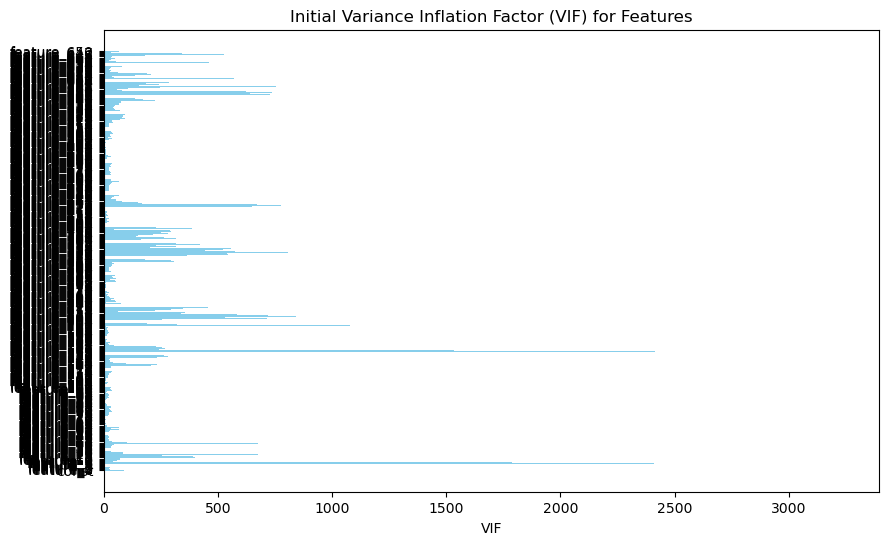


Initial VIF values for each feature:
         Feature         VIF
0          const   88.986140
1      feature_0   27.748404
2      feature_1   25.014328
3      feature_2   28.624171
4      feature_3   25.178266
..           ...         ...
467  feature_644  181.005280
468  feature_645  526.238062
469  feature_646  341.245048
470  feature_647   31.611961
471  feature_650   65.390858

[394 rows x 2 columns]


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide




Final VIF values after dropping features:
         Feature         VIF
0          const   88.986140
1      feature_0   27.748404
2      feature_1   25.014328
3      feature_2   28.624171
4      feature_3   25.178266
..           ...         ...
467  feature_644  181.005280
468  feature_645  526.238062
469  feature_646  341.245048
470  feature_647   31.611961
471  feature_650   65.390858

[394 rows x 2 columns]


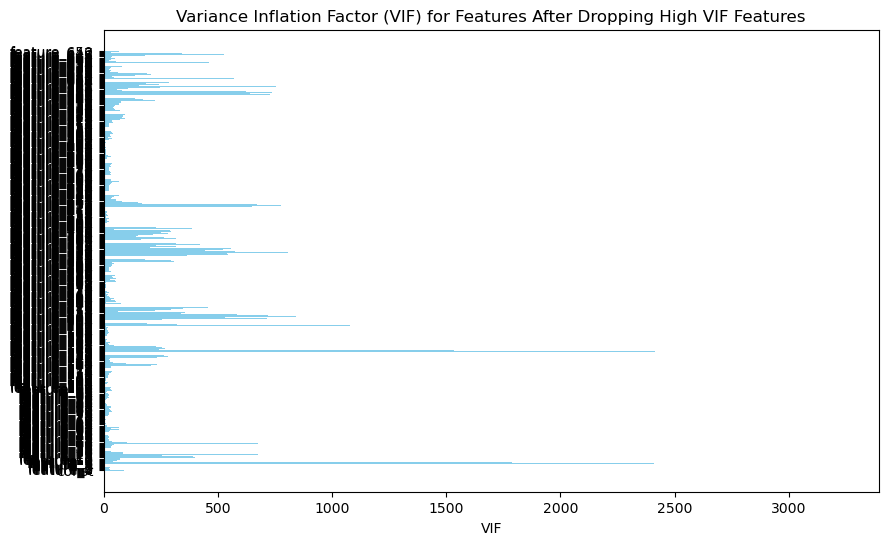


Shape of the dataset after removing high VIF features: (611, 471)


In [229]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X_selected is your feature matrix (DataFrame)
# X_selected = your_data

# Check for constant features and drop them
constant_features = X_selected.columns[X_selected.nunique() == 1]
X_selected = X_selected.drop(columns=constant_features)

# Check for highly correlated features and drop them (optional)
corr_matrix = X_selected.corr()
correlated_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.95:  # Adjust the threshold as needed
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

X_selected = X_selected.drop(columns=correlated_features)
print(f"Shape after dropping constant/correlated features: {X_selected.shape}")

# Add a constant to the model (for intercept)
X_with_const = sm.add_constant(X_selected)

# Function to calculate VIF for the current dataset
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    # Remove infinite or NaN VIF values
    vif_data = vif_data[~vif_data['VIF'].isin([np.inf, -np.inf, np.nan])]
    return vif_data


# Initial VIF calculation
vif_data = calculate_vif(X_with_const)

# Plot initial VIF values
plt.figure(figsize=(10, 6))
plt.barh(vif_data['Feature'], vif_data['VIF'], color='skyblue')
plt.xlabel('VIF')
plt.title('Initial Variance Inflation Factor (VIF) for Features')
plt.show()

print("\nInitial VIF values for each feature:")
print(vif_data)

# Define the threshold
threshold = 0.2 * 10**8

# Use a for loop to iterate over the features and remove those with VIF > threshold
features_to_drop = vif_data[vif_data['VIF'] > threshold]['Feature']

# Drop all features that exceed the threshold
for feature in features_to_drop:
    if feature in X_selected.columns:  # Check if the feature exists in X_selected
        print(f"Dropping feature '{feature}' with VIF: {vif_data[vif_data['Feature'] == feature]['VIF'].values[0]}")
        X_selected = X_selected.drop(columns=[feature])

# Recompute VIF for the remaining features
X_with_const = sm.add_constant(X_selected)
vif_data = calculate_vif(X_with_const)

# Display the final VIF values after dropping high VIF features
print("\nFinal VIF values after dropping features:")
print(vif_data)

# Plot VIF after dropping features
plt.figure(figsize=(10, 6))
plt.barh(vif_data['Feature'], vif_data['VIF'], color='skyblue')
plt.xlabel('VIF')
plt.title('Variance Inflation Factor (VIF) for Features After Dropping High VIF Features')
plt.show()

# Final shape of the dataset after dropping high VIF features
print(f"\nShape of the dataset after removing high VIF features: {X_selected.shape}")

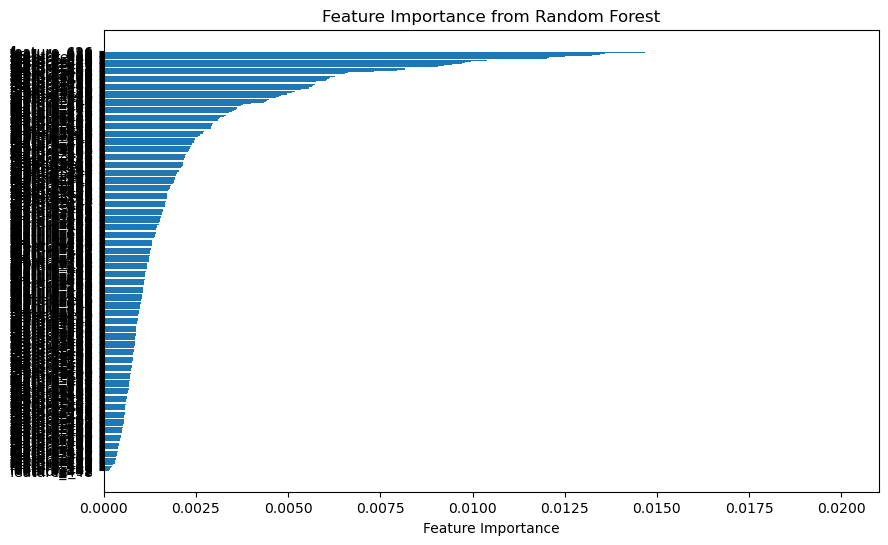

(427,)


In [21]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Fit a random forest model
model = RandomForestClassifier()
model.fit(X_selected, y)

# Get feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
sorted_idx = importances.argsort()

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(X_selected.columns[sorted_idx], importances[sorted_idx], align='center')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

# Optionally, select features with importance greater than 0.005
selected_features = X_selected.columns[importances > 0.0005]
print(selected_features.shape)
X_selected = X_selected.drop(columns=X_selected.columns[importances < 0.0005])

In [230]:
from sklearn.feature_selection import mutual_info_classif

# Get information gain for each feature
info_gain = mutual_info_classif(X_selected, y)

# Use X_selected.columns to match the feature set size
selected_features = X_selected.columns[info_gain > 0.05]

# Print selected features
print(selected_features)
print
X_selected = X_selected.drop(columns = X_selected.columns[info_gain < 0.5])

Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',
       ...
       'feature_639', 'feature_640', 'feature_641', 'feature_642',
       'feature_643', 'feature_644', 'feature_645', 'feature_646',
       'feature_647', 'feature_650'],
      dtype='object', length=443)


In [126]:
#method of feature selection 1
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
print(X.shape)

lda = LDA(n_components=5)  # LDA can have a maximum of (number of classes - 1) components
X_reduced = lda.fit_transform(X, y)  # Transformed features for the classification model
print(X_reduced.shape)
#X_reduced

(495, 656)
(495, 5)


In [86]:
#method of feature selection 2
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
print(X.shape)

# Select top k features based on chi-square score
selector = SelectKBest(chi2, k=10)
X_selected = selector.fit_transform(abs(X), y)
print(X_selected.shape)
#X_selected

(495, 389)
(495, 10)


In [88]:
#method of feature selection 3
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Define model
model = RandomForestClassifier()
# Initialize RFE and fit to data
rfe = RFE(estimator=model, n_features_to_select=10)
X_rfe = rfe.fit_transform(X, y)
print(X_rfe.shape)

#X_rfe

(495, 10)


In [ ]:
#method of feature selection 4
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Fit a Lasso model with regularization
lasso = Lasso(alpha=0.01).fit(X, y)
model = SelectFromModel(lasso, prefit=True)
X_lasso = model.transform(X)
print(X_lasso.shape)


In [231]:
#method of feature selection 5
from sklearn.decomposition import PCA

# Initialize PCA and fit to data
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)
print(X_pca.shape)


(611, 10)


In [ ]:
#method of feature selection 6
from sklearn.feature_selection import mutual_info_classif, SelectKBest

# Select top k features based on mutual information score
selector = SelectKBest(mutual_info_classif, k=10)
X_selected = selector.fit_transform(X, y)

In [ ]:
#method of feature selection 7
from sklearn.feature_selection import mutual_info_classif

# Get information gain for each feature
info_gain = mutual_info_classif(X, y)
selected_features = X.columns[info_gain > 0.05]

In [277]:
X_unlabelled = X_pca[y == 'NULL']        # For null values in y
X_labelled = X_pca[y != 'NULL']           # For non-null values in y
print(X_unlabelled.shape)
print(X_labelled.shape)
# Ensure X_labelled is a pandas DataFrame with the same index as y
X_labelled_df = pd.DataFrame(X_labelled, index=y[y != 'NULL'].index)

# Splitting into training (70%) and test (30%) datasets
X_train, X_test, y_train, y_test = train_test_split(X_labelled_df, y[y != 'NULL'], test_size=0.3, random_state=42)


(116, 10)
(495, 10)


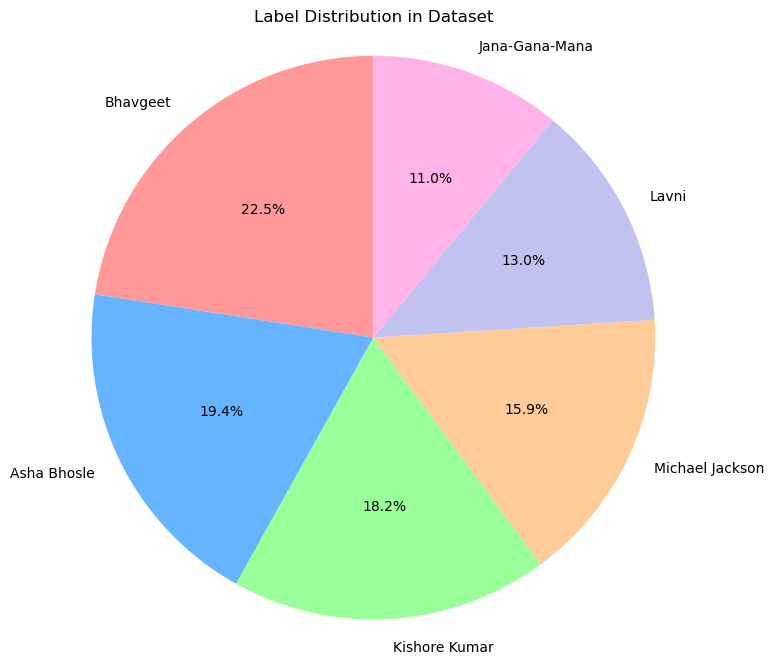

In [279]:

#making a pie chart to show weight of each label
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'labels' is a list of the labels in your dataset (replace it with your actual labels)
labels = ['Asha Bhosale', 'Kishore Kumar', 'Lavni', 'Michael Jackson', 'Jana Gana Mana', 'Bhavgeet']  

# Count the occurrences of each label in the 'labels' column using value_counts
label_counts = y_train.value_counts()

# Data for the pie chart
labels = label_counts.index
sizes = label_counts.values

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0','#ffb3e6'])

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title
plt.title('Label Distribution in Dataset')

# Show the chart
plt.show()

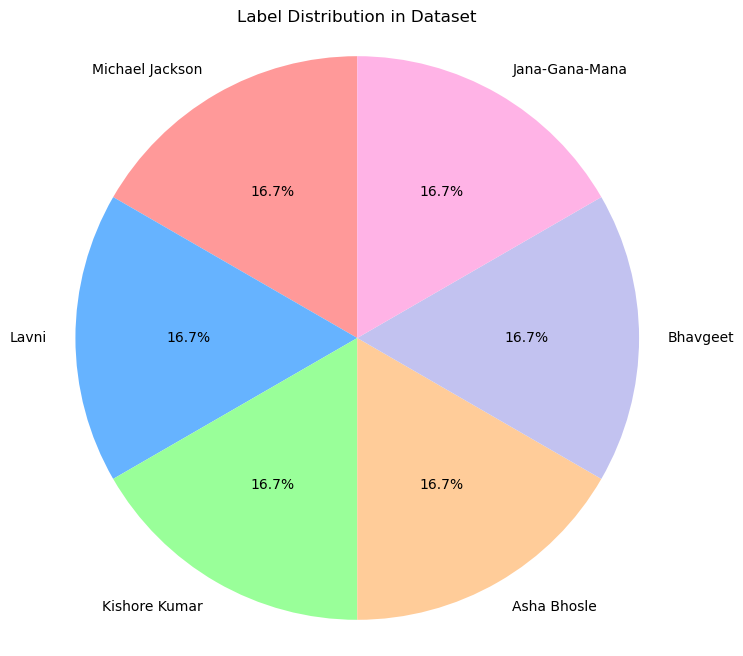

In [281]:
#from the above pie chart we can tell that the data is imbalanced, to fix the data imbalance we can use SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to the training data
X_train, y_train = smote.fit_resample(X_train, y_train)


# Count the occurrences of each label in the 'labels' column using value_counts
label_counts = y_train.value_counts()

# Data for the pie chart
labels = label_counts.index
sizes = label_counts.values

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0','#ffb3e6'])

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title
plt.title('Label Distribution in Dataset')

# Show the chart
plt.show()

In [283]:
from sklearn.preprocessing import LabelEncoder

#dimensional reduction

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


In [285]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier

# Dictionary to store models and results
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    #'SVM': SVC(kernel='rbf', C=1.0, probability=True), # SVC with probability=True for probability estimates
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1),
    'AdaBoost': AdaBoostClassifier(n_estimators=50),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(max_depth=10),
    'XGBoost': xgb.XGBClassifier(n_estimators=100, learning_rate=0.1),
    'SVC_linear': SVC(kernel='linear', probability=True),
    'SVC_rbf': SVC(kernel='rbf', probability=True),
    'RandomForest_1': RandomForestClassifier(min_samples_leaf=1),
    'RandomForest_3': RandomForestClassifier(min_samples_leaf=3),
    'RandomForest_5': RandomForestClassifier(min_samples_leaf=5),
    'NeuralNetwork_1': MLPClassifier(hidden_layer_sizes=(5)),
    'NeuralNetwork_2': MLPClassifier(hidden_layer_sizes=(5, 5)),
    'NeuralNetwork_3': MLPClassifier(hidden_layer_sizes=(5, 5, 5)),
    'NeuralNetwork_4': MLPClassifier(hidden_layer_sizes=(10))

}



Training Logistic Regression...


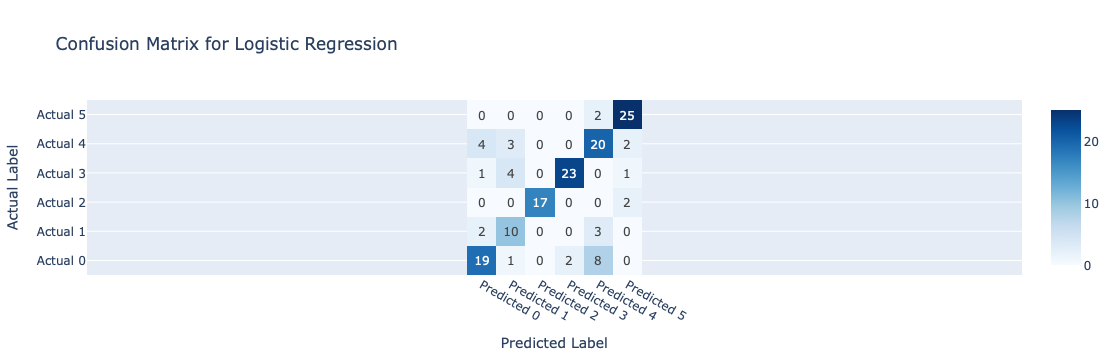


Training K-Nearest Neighbors...


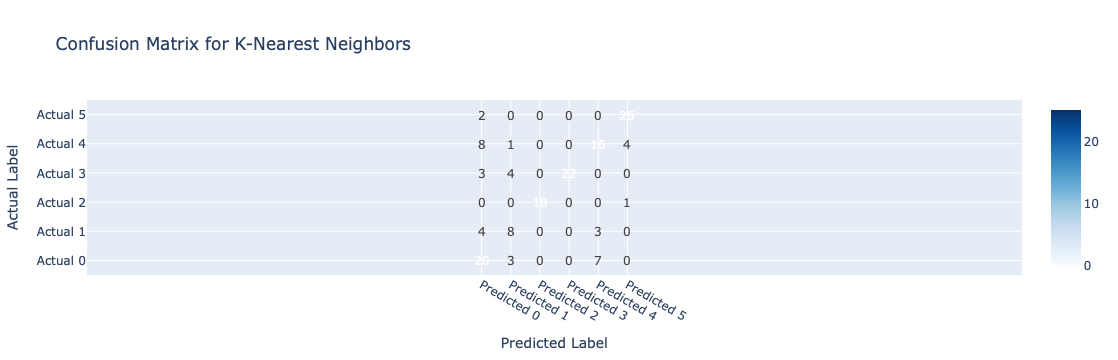


Training Random Forest...


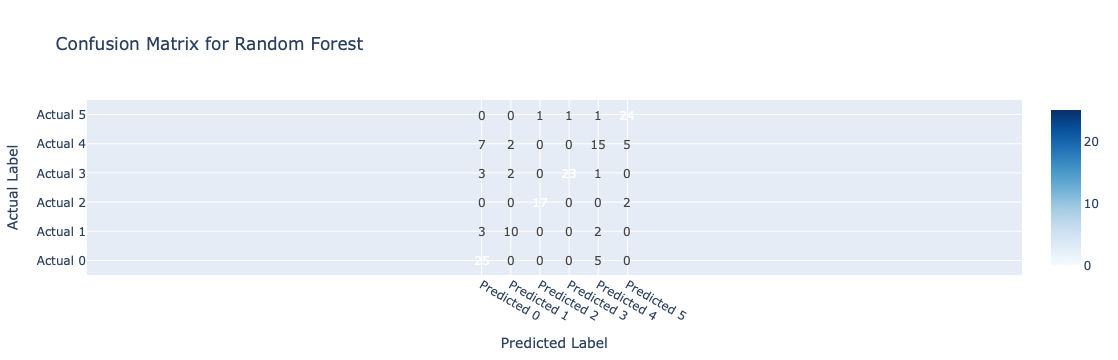


Training Gradient Boosting...


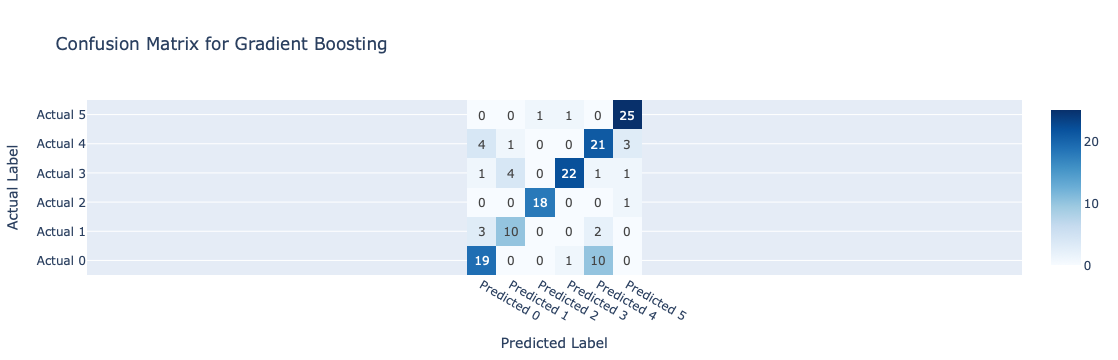


Training AdaBoost...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



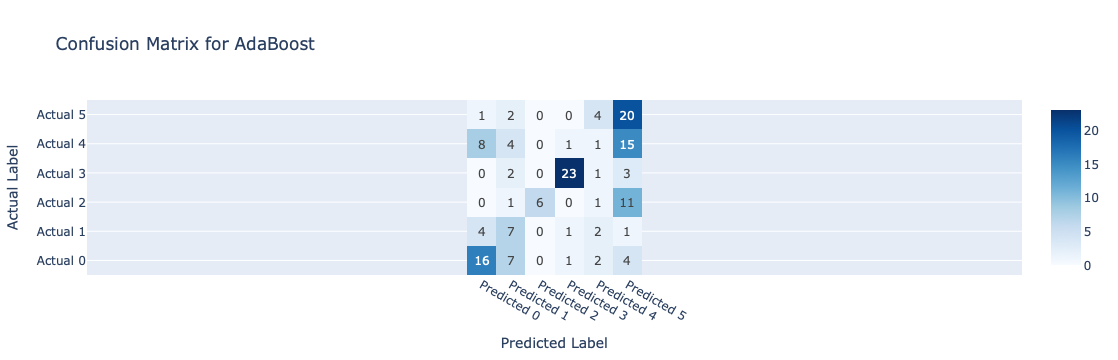


Training Naive Bayes...


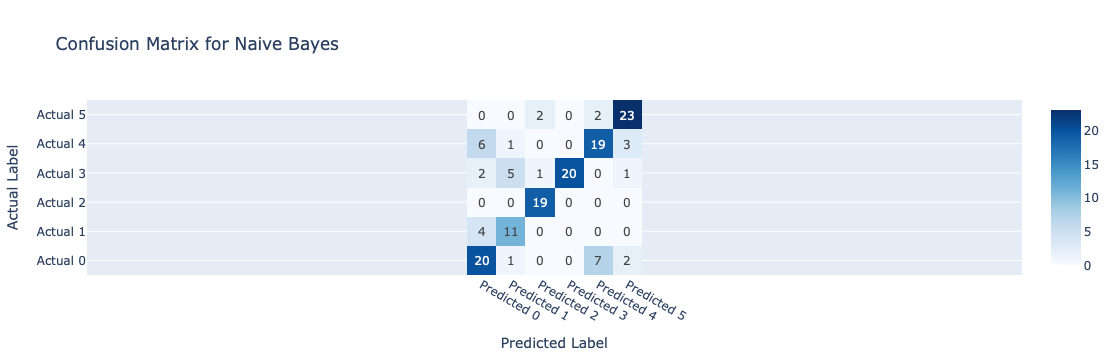


Training Decision Tree...


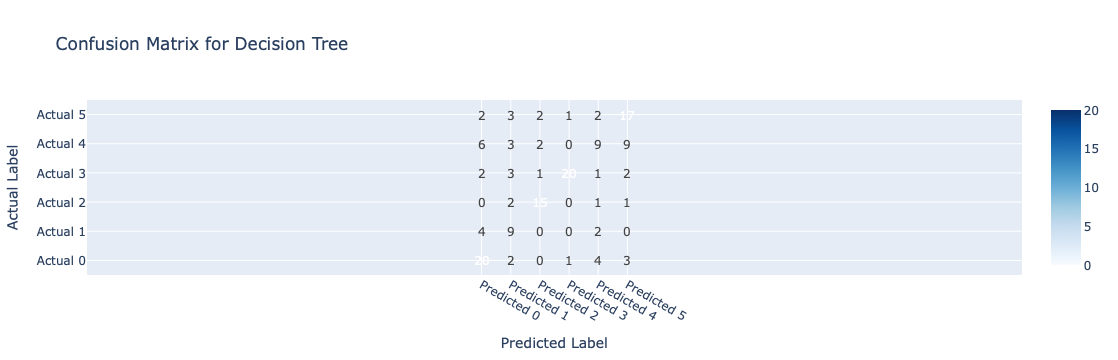


Training XGBoost...


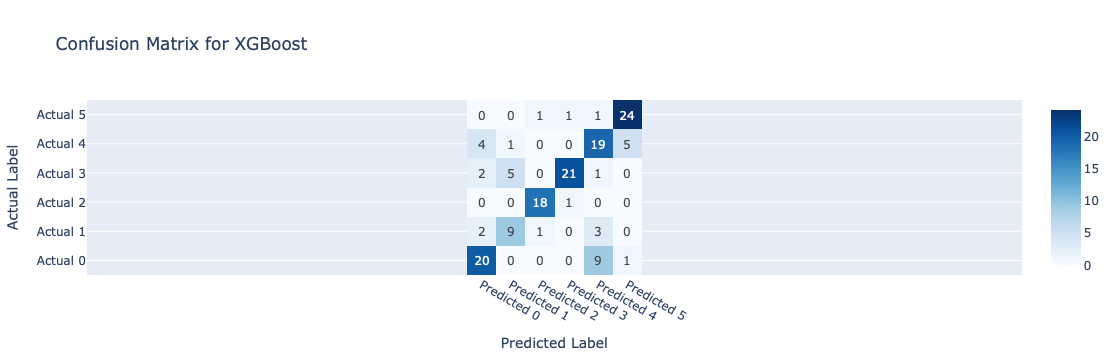


Training SVC_linear...


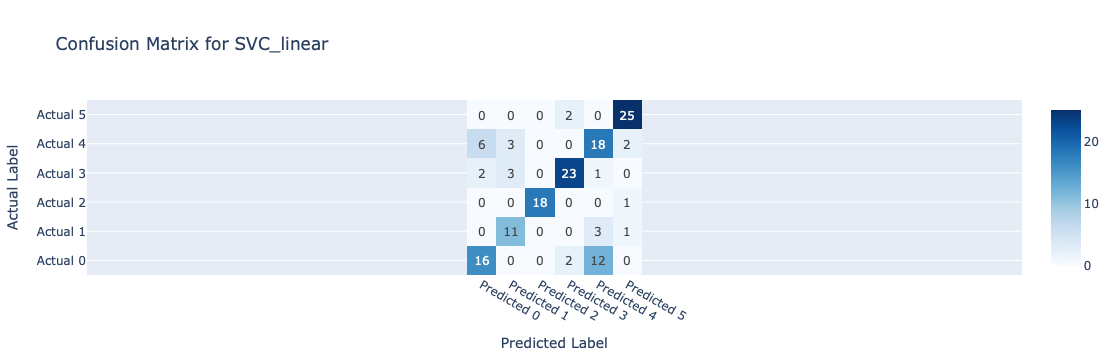


Training SVC_rbf...


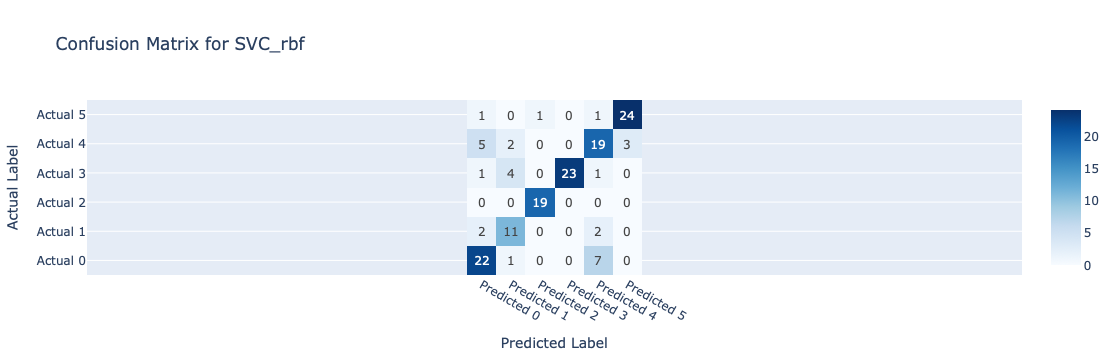


Training RandomForest_1...


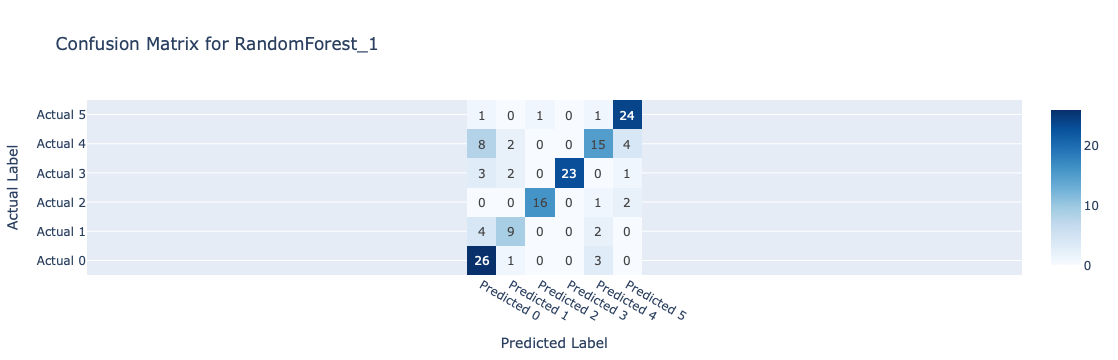


Training RandomForest_3...


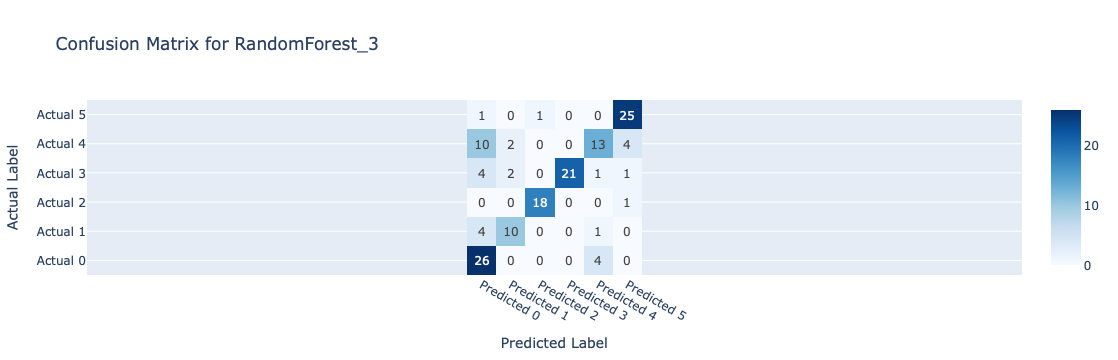


Training RandomForest_5...


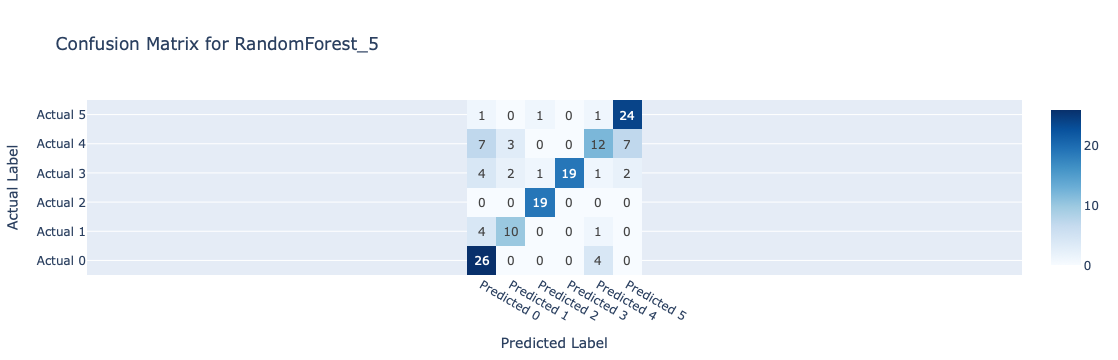


Training NeuralNetwork_1...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



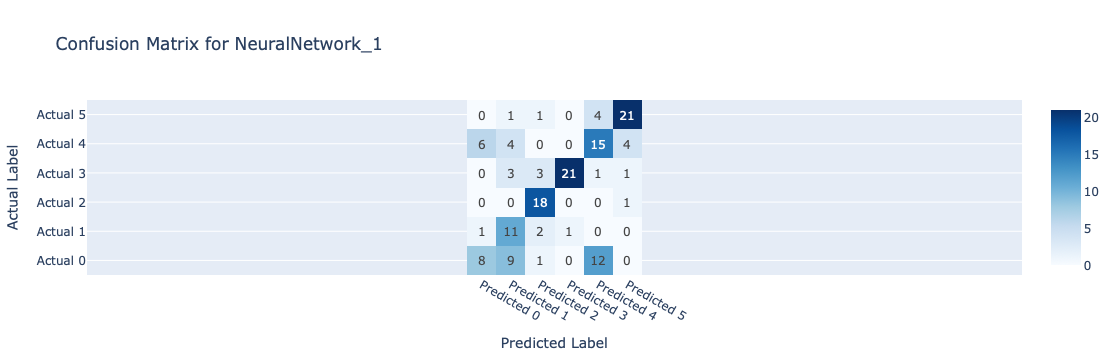


Training NeuralNetwork_2...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.12/si

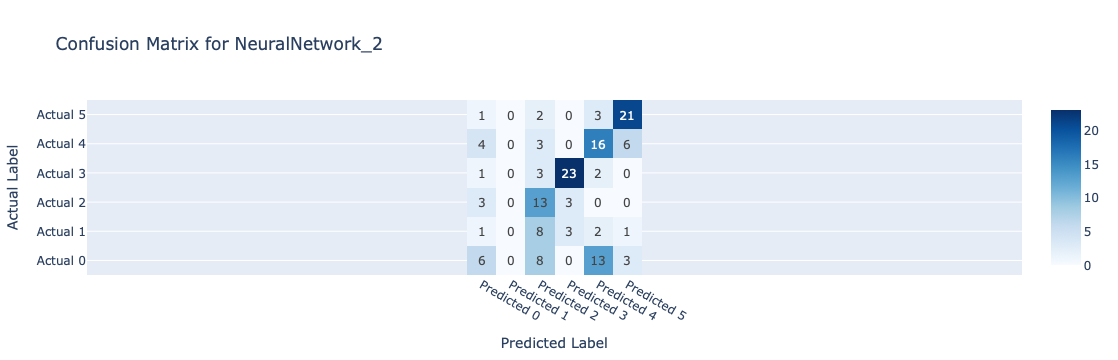


Training NeuralNetwork_3...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



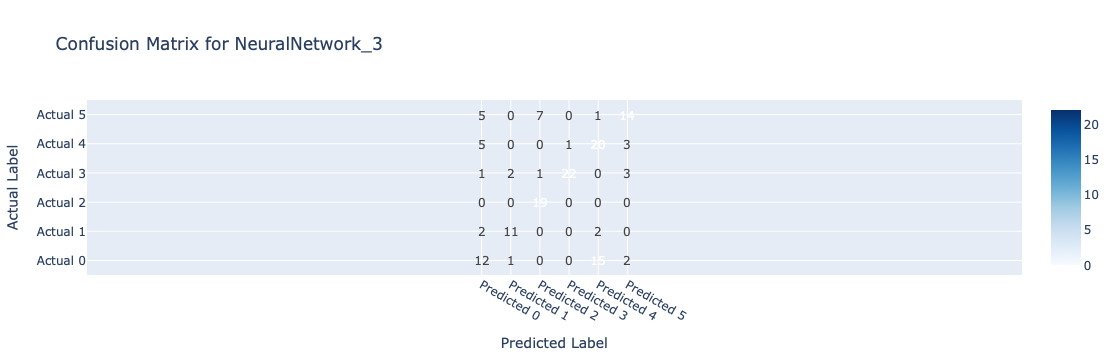


Training NeuralNetwork_4...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



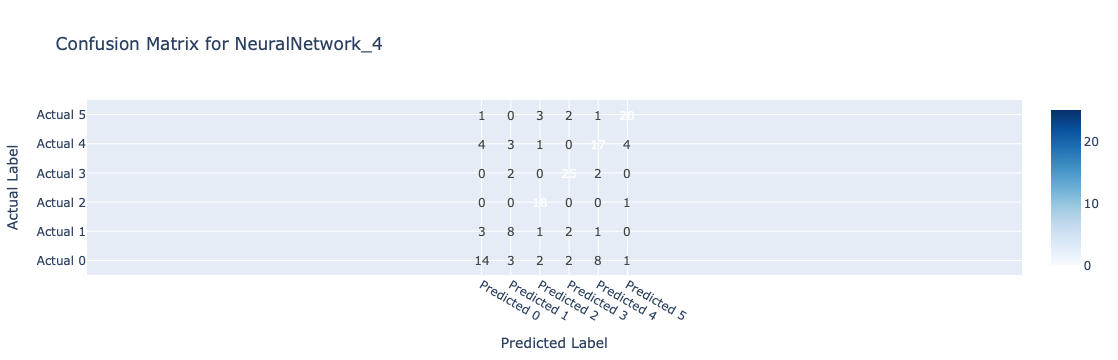

In [287]:
import plotly.graph_objects as go

results = {}

# Training, prediction, and metric calculations
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train_encoded)  # Train the model
    y_pred_train = model.predict(X_train) #Predict on train set
    y_pred_test = model.predict(X_test)  # Predict on the test set
    
    # Storing metrics
    results[model_name] = {
        "Accuracy_Train": accuracy_score(y_train_encoded, y_pred_train),
        "Accuracy_Test": accuracy_score(y_test_encoded, y_pred_test),
        "Precision": precision_score(y_train_encoded, y_pred_train, average='weighted'),
        "Precision": precision_score(y_test_encoded, y_pred_test, average='weighted'),
        "Recall": recall_score(y_train_encoded, y_pred_train, average='weighted'),
        "Recall": recall_score(y_test_encoded, y_pred_test, average='weighted'),
        "F1 Score": f1_score(y_train_encoded, y_pred_train, average='weighted'),
        "F1 Score": f1_score(y_test_encoded, y_pred_test, average='weighted'),
        "Confusion Matrix": confusion_matrix(y_test_encoded, y_pred_test),
        "Classification Report": classification_report(y_train_encoded, y_pred_train),
        "Classification Report": classification_report(y_test_encoded, y_pred_test)
    }

    # Plotting the confusion matrix using Plotly with numbers displayed and square grid
    confusion_mat = results[model_name]["Confusion Matrix"]
    fig = go.Figure(data=go.Heatmap(
        z=confusion_mat,
        x=[f"Predicted {i}" for i in range(len(confusion_mat))],
        y=[f"Actual {i}" for i in range(len(confusion_mat))],
        colorscale="Blues",
        text=confusion_mat,  # Display numbers in each cell
        texttemplate="%{text}",  # Format to show text values
        showscale=True
    ))
    fig.update_layout(
        title=f"Confusion Matrix for {model_name}",
        xaxis_title="Predicted Label",
        yaxis_title="Actual Label",
        xaxis=dict(scaleanchor="y", scaleratio=1)  # Ensures square cells
    )
    fig.show()


In [289]:

# Display the results
for model_name, metrics in results.items():
    print(f"\nMetrics for {model_name}:\n")
    for metric, value in metrics.items():
        print(f"{metric}:\n{value}\n")



Metrics for Logistic Regression:

Accuracy_Train:
0.8653846153846154

Accuracy_Test:
0.7651006711409396

Precision:
0.7786051532360257

Recall:
0.7651006711409396

F1 Score:
0.7683898526300047

Confusion Matrix:
[[19  1  0  2  8  0]
 [ 2 10  0  0  3  0]
 [ 0  0 17  0  0  2]
 [ 1  4  0 23  0  1]
 [ 4  3  0  0 20  2]
 [ 0  0  0  0  2 25]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.63      0.68        30
           1       0.56      0.67      0.61        15
           2       1.00      0.89      0.94        19
           3       0.92      0.79      0.85        29
           4       0.61      0.69      0.65        29
           5       0.83      0.93      0.88        27

    accuracy                           0.77       149
   macro avg       0.77      0.77      0.77       149
weighted avg       0.78      0.77      0.77       149



Metrics for K-Nearest Neighbors:

Accuracy_Train:
0.8846153846153846

Accuracy_Test:
0.7315

In [291]:
print("\nAll Models Accuracy:")
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics['Accuracy_Train']:.4f}", f"{model_name}: {metrics['Accuracy_Test']:.4f}")


All Models Accuracy:
Logistic Regression: 0.8654 Logistic Regression: 0.7651
K-Nearest Neighbors: 0.8846 K-Nearest Neighbors: 0.7315
Random Forest: 0.9979 Random Forest: 0.7651
Gradient Boosting: 0.9979 Gradient Boosting: 0.7718
AdaBoost: 0.5684 AdaBoost: 0.4899
Naive Bayes: 0.8098 Naive Bayes: 0.7517
Decision Tree: 0.9701 Decision Tree: 0.6040
XGBoost: 0.9979 XGBoost: 0.7450
SVC_linear: 0.9103 SVC_linear: 0.7450
SVC_rbf: 0.8953 SVC_rbf: 0.7919
RandomForest_1: 0.9979 RandomForest_1: 0.7584
RandomForest_3: 0.9744 RandomForest_3: 0.7584
RandomForest_5: 0.9359 RandomForest_5: 0.7383
NeuralNetwork_1: 0.7030 NeuralNetwork_1: 0.6309
NeuralNetwork_2: 0.5406 NeuralNetwork_2: 0.5302
NeuralNetwork_3: 0.7137 NeuralNetwork_3: 0.6577
NeuralNetwork_4: 0.7949 NeuralNetwork_4: 0.6846


In [293]:
print("\nAll Models Precison:")
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics['Precision']:.4f}")


All Models Precison:
Logistic Regression: 0.7786
K-Nearest Neighbors: 0.7521
Random Forest: 0.7733
Gradient Boosting: 0.7792
AdaBoost: 0.5262
Naive Bayes: 0.7679
Decision Tree: 0.6207
XGBoost: 0.7537
SVC_linear: 0.7519
SVC_rbf: 0.8045
RandomForest_1: 0.7770
RandomForest_3: 0.7830
RandomForest_5: 0.7565
NeuralNetwork_1: 0.6567
NeuralNetwork_2: 0.4839
NeuralNetwork_3: 0.6694
NeuralNetwork_4: 0.6807


In [295]:
print("\nAll Models Recall:")
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics['Recall']:.4f}")


All Models Recall:
Logistic Regression: 0.7651
K-Nearest Neighbors: 0.7315
Random Forest: 0.7651
Gradient Boosting: 0.7718
AdaBoost: 0.4899
Naive Bayes: 0.7517
Decision Tree: 0.6040
XGBoost: 0.7450
SVC_linear: 0.7450
SVC_rbf: 0.7919
RandomForest_1: 0.7584
RandomForest_3: 0.7584
RandomForest_5: 0.7383
NeuralNetwork_1: 0.6309
NeuralNetwork_2: 0.5302
NeuralNetwork_3: 0.6577
NeuralNetwork_4: 0.6846


In [297]:
print("\nAll Models f1-Score:")
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics['F1 Score']:.4f}")


All Models f1-Score:
Logistic Regression: 0.7684
K-Nearest Neighbors: 0.7363
Random Forest: 0.7637
Gradient Boosting: 0.7724
AdaBoost: 0.4695
Naive Bayes: 0.7527
Decision Tree: 0.6030
XGBoost: 0.7461
SVC_linear: 0.7455
SVC_rbf: 0.7952
RandomForest_1: 0.7579
RandomForest_3: 0.7550
RandomForest_5: 0.7300
NeuralNetwork_1: 0.6244
NeuralNetwork_2: 0.4931
NeuralNetwork_3: 0.6540
NeuralNetwork_4: 0.6778


In [299]:
#show decision boundary
#ROC Curve

In [301]:
#identify the three songs of each category
#showcase the waveform for each of the three songs found for each category

In [313]:
import os
import pandas as pd

# Specify the folder where you want to save the files
output_folder = 'labeled_data_files'

# Create the folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Assuming `X_unlabelled` and `models` are already defined
unlabelled_data = X_unlabelled.copy()
# Dictionary to store labeled data for each model
labeled_data_files = {}
unlabelled_data = pd.DataFrame(unlabelled_data)

# Loop through each model in the dictionary, predict labels, and save to a file
for model_name, model in models.items():
    print(f"Labeling data using {model_name}...")
    
    # Predict the labels for the unlabelled data
    predictions = model.predict(unlabelled_data)
    
    # Add predictions to the unlabelled data
    labeled_data = unlabelled_data.copy()
    labeled_data['Predicted_Label'] = predictions
    
    # Create the full path for saving the labeled data
    filename = os.path.join(output_folder, f"{model_name}_labeled_data.csv")
    
    # Save the labeled data to a CSV file in the specified folder
    labeled_data.to_csv(filename, index=False)
    
    # Store the filename in the dictionary for reference
    labeled_data_files[model_name] = filename
    print(f"Labeled data saved to {filename}")

print("done")


Labeling data using Logistic Regression...
Labeled data saved to labeled_data_files/Logistic Regression_labeled_data.csv
Labeling data using K-Nearest Neighbors...
Labeled data saved to labeled_data_files/K-Nearest Neighbors_labeled_data.csv
Labeling data using Random Forest...
Labeled data saved to labeled_data_files/Random Forest_labeled_data.csv
Labeling data using Gradient Boosting...
Labeled data saved to labeled_data_files/Gradient Boosting_labeled_data.csv
Labeling data using AdaBoost...
Labeled data saved to labeled_data_files/AdaBoost_labeled_data.csv
Labeling data using Naive Bayes...
Labeled data saved to labeled_data_files/Naive Bayes_labeled_data.csv
Labeling data using Decision Tree...
Labeled data saved to labeled_data_files/Decision Tree_labeled_data.csv
Labeling data using XGBoost...
Labeled data saved to labeled_data_files/XGBoost_labeled_data.csv
Labeling data using SVC_linear...
Labeled data saved to labeled_data_files/SVC_linear_labeled_data.csv
Labeling data using

In [315]:
import os
import pandas as pd

# Specify the folder where the labeled data files are stored
output_folder = 'labeled_data_files'

# Initialize a dictionary to store the frequency of labels for each file
label_frequencies = {}

# Iterate through each CSV file in the directory
for filename in os.listdir(output_folder):
    if filename.endswith('.csv'):  # Ensure we are processing CSV files
        file_path = os.path.join(output_folder, filename)
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Check if 'Predicted_Label' column exists
        if 'Predicted_Label' in df.columns:
            # Count the frequency of labels in the 'Predicted_Label' column
            label_counts = df['Predicted_Label'].value_counts()
            
            # Store the frequencies in the dictionary
            label_frequencies[filename] = label_counts
        else:
            print(f"Warning: 'Predicted_Label' column not found in {filename}")

# Print the label frequencies for each file
for filename, label_count in label_frequencies.items():
    print(f"Label frequencies in {filename}:")
    print(label_count)
    print()


Label frequencies in NeuralNetwork_1_labeled_data.csv:
Predicted_Label
0    41
2    34
4    19
1     9
5     8
3     5
Name: count, dtype: int64

Label frequencies in SVC_rbf_labeled_data.csv:
Predicted_Label
0    51
2    21
4    16
3    15
5     9
1     4
Name: count, dtype: int64

Label frequencies in K-Nearest Neighbors_labeled_data.csv:
Predicted_Label
0    51
2    25
3    15
4    13
1     8
5     4
Name: count, dtype: int64

Label frequencies in XGBoost_labeled_data.csv:
Predicted_Label
0    26
2    25
5    22
4    18
3    17
1     8
Name: count, dtype: int64

Label frequencies in RandomForest_3_labeled_data.csv:
Predicted_Label
0    44
2    27
4    20
5    16
3     5
1     4
Name: count, dtype: int64

Label frequencies in SVC_linear_labeled_data.csv:
Predicted_Label
0    35
3    33
2    19
1    13
4     9
5     7
Name: count, dtype: int64

Label frequencies in Gradient Boosting_labeled_data.csv:
Predicted_Label
0    38
2    24
3    19
1    16
4    11
5     8
Name: count, dtype: i